# Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import h5py as h5 #to read the correlator
import numpy as np #to do everything
from pathlib import Path #to read the file's names
from typing import Any, Callable #to use annotations for functions
import matplotlib.pyplot as plt #to plot stuff
from tqdm import tqdm #for a nice view of for loops with loading bars
import os #to access enviromental variables




import sys

sys.path.insert(1, '../')

from moments_toolkit import moments_toolkit



# Tests 1

In [3]:
p3fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW/3PointCorrelation/"
p2fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW/2PointCorrelation/"


opAnalyzer = moments_toolkit(p3fold, p2fold,
                            #maxConf=50,
                            T_to_remove_list=[12], skip3p=False, skipop=False,
                            verbose=True,
                            fast_data_folder = "../fast_data",
                            operator_folder= "../operator_database",
                            max_n=3)


Initializing the moments_toolkit class instance...


Initializing the building block class instance...


Reading the the keys of the dataset ...


Reading the 2 point and 3 point correlators from the fast acces dataset ...


Reading the list of all the available operators from the database...


Class Initialization Complete!



In [6]:
opAnalyzer.operator_show()

In [4]:
opAnalyzer.operators_dict.keys()

opAnalyzer.operators_dict[(3,'T')].keys()

dict_keys([(2, 'V'), (2, 'A'), (3, 'T'), (3, 'V'), (3, 'A'), (4, 'T')])

dict_keys([((4, 1), 1), ((4, 1), 2), ((4, 1), 3), ((4, 1), 4), ((4, 2), 1), ((4, 4), 1), ((8, 1), 1), ((8, 1), 2), ((8, 1), 3), ((8, 2), 1), ((8, 2), 2)])

In [4]:
op32 = opAnalyzer.get_operator(33)
op32.K
op32.O
op32.cgmat
op32.n
op32.nder

0

1.0*O[2, 1, 2] + 1.0*O[3, 1, 3] + 1.0*O[4, 1, 4]

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

3

1

In [3]:
opAnalyzer.operator_list

[O[1, 1] + O[2, 2] + O[3, 3] + O[4, 4],
 O[1, 1] + O[2, 2] + O[3, 3] - 3*O[4, 4],
 O[1, 1] + O[2, 2] - 2*O[3, 3],
 O[1, 1] - O[2, 2],
 O[1, 2] - O[2, 1],
 O[1, 3] - O[3, 1],
 O[2, 3] - O[3, 2],
 O[1, 4] - O[4, 1],
 O[2, 4] - O[4, 2],
 O[3, 4] - O[4, 3],
 O[1, 2] + O[2, 1],
 O[1, 3] + O[3, 1],
 O[2, 3] + O[3, 2],
 O[1, 4] + O[4, 1],
 O[2, 4] + O[4, 2],
 O[3, 4] + O[4, 3],
 O[1, 1] + O[2, 2] + O[3, 3] + O[4, 4],
 O[1, 1] + O[2, 2] + O[3, 3] - 3*O[4, 4],
 O[1, 1] + O[2, 2] - 2*O[3, 3],
 O[1, 1] - O[2, 2],
 O[3, 4] - O[4, 3],
 O[2, 4] - O[4, 2],
 O[1, 4] - O[4, 1],
 O[2, 3] - O[3, 2],
 O[1, 3] - O[3, 1],
 O[1, 2] - O[2, 1],
 O[1, 2] + O[2, 1],
 O[1, 3] + O[3, 1],
 O[2, 3] + O[3, 2],
 O[1, 4] + O[4, 1],
 O[2, 4] + O[4, 2],
 O[3, 4] + O[4, 3],
 O[2, 1, 2] + O[3, 1, 3] + O[4, 1, 4],
 O[1, 2, 1] + O[3, 2, 3] + O[4, 2, 4],
 O[1, 3, 1] + O[2, 3, 2] + O[4, 3, 4],
 O[1, 4, 1] + O[2, 4, 2] + O[3, 4, 3],
 O[2, 2, 1] + O[3, 3, 1] + O[4, 4, 1],
 O[1, 1, 2] + O[3, 3, 2] + O[4, 4, 2],
 O[1, 1, 3] + O[2,

In [9]:
opAnalyzer.T_list

[6]

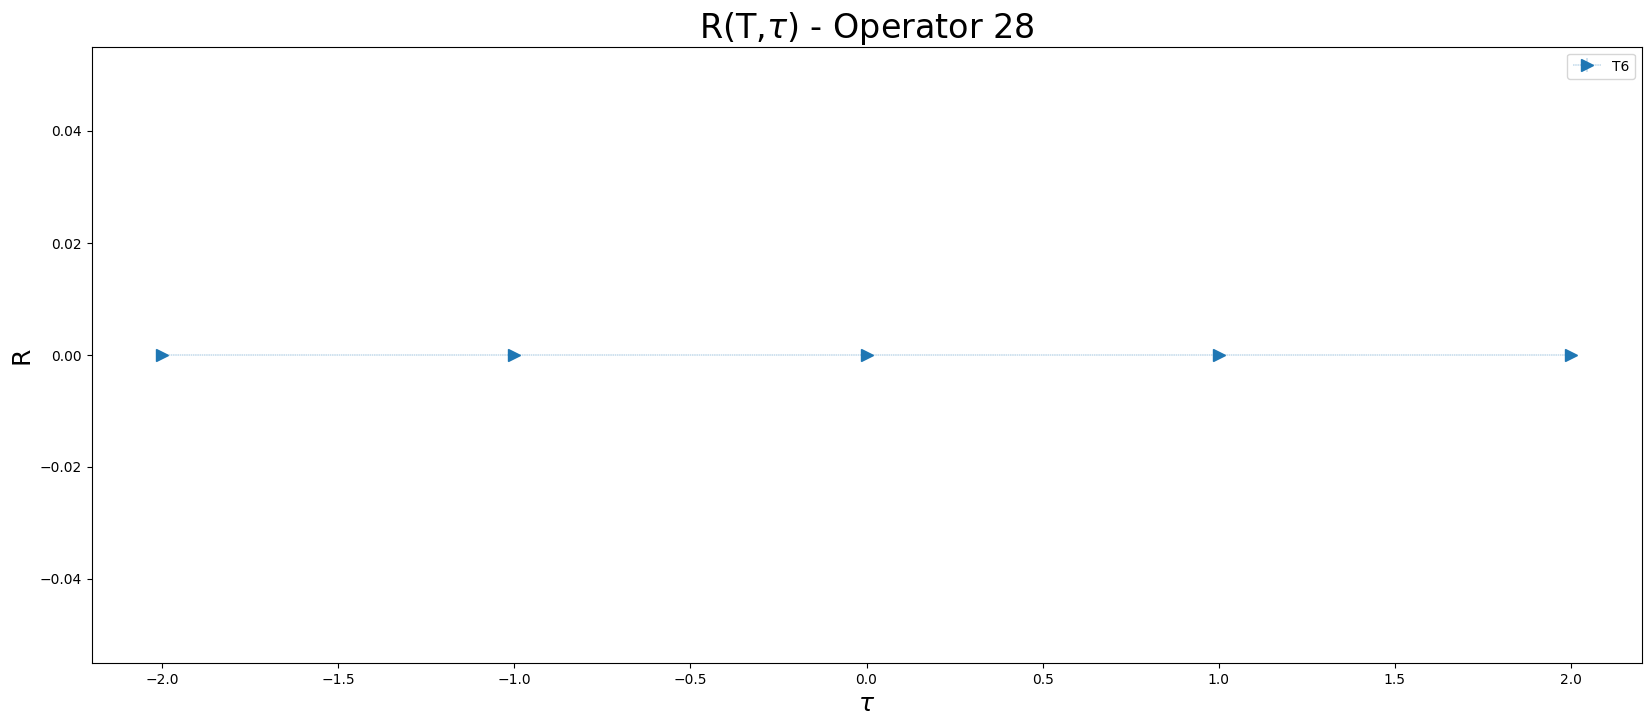

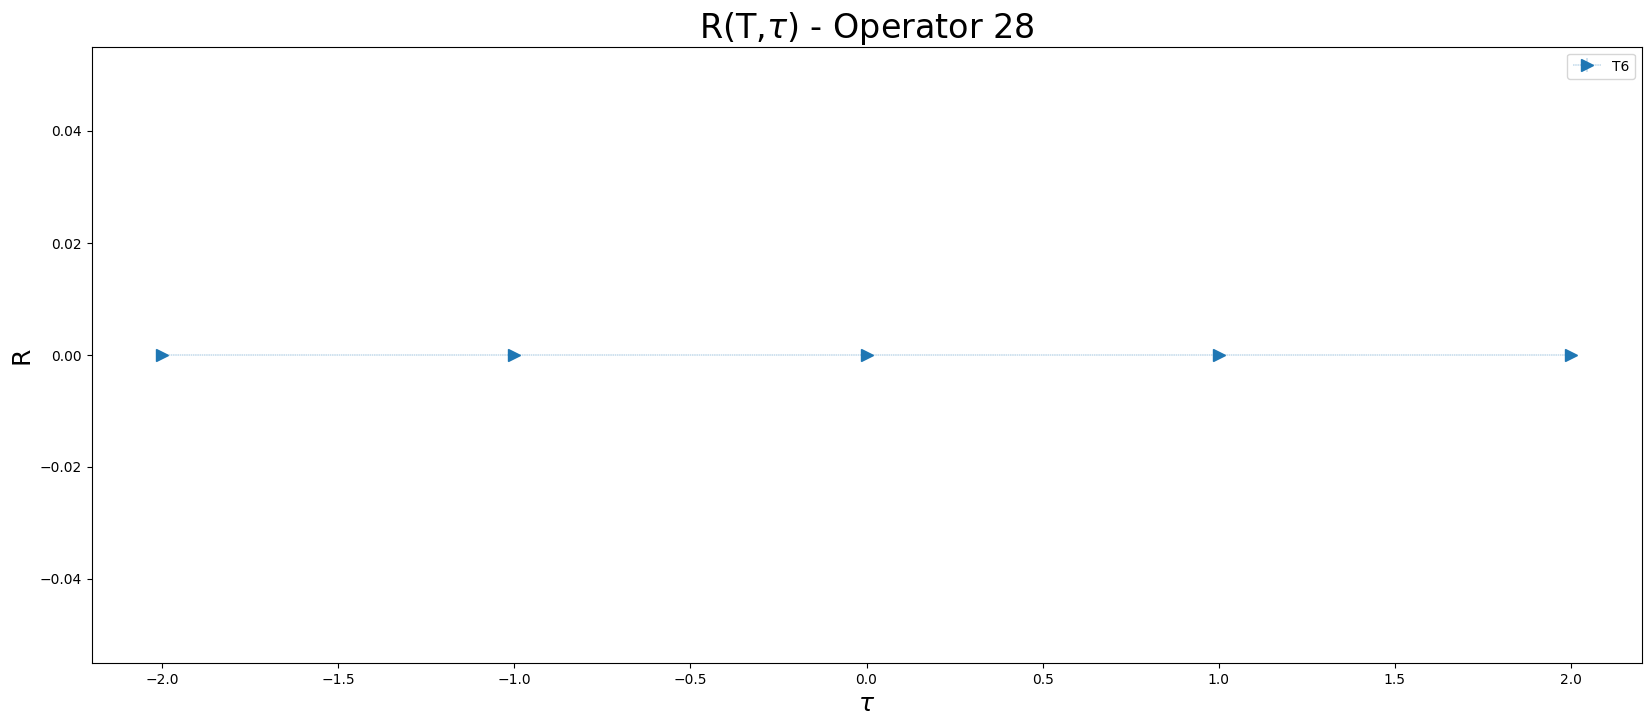

In [6]:
opAnalyzer.select_operator(28)

opAnalyzer.plot_R(show=True, save=False)
opAnalyzer.plot_R(show=True, save=False, abs=True)

In [15]:
operator_folder= "../operator_database"
p = Path(operator_folder).glob('**/*')

#we list the operator files, sorted according to their number
operator_files = [x for x in p if x.is_file()]

#we sort the files according to the operator number
operator_files.sort(key=lambda x: int(x.name.split("_")[1]))
type(operator_files[0])

pathlib.PosixPath

In [36]:
operator_files[0].as_posix()

i=32
mat = np.load(operator_files[i].as_posix())
operator_files[i].as_posix()

mat

'../operator_database/operator_1_2_V_1_1_1_1.npy'

'../operator_database/operator_33_3_T_4_1_1_1.npy'

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [16]:
file = operator_files[0]

file.stem
file.name

'operator_1_2_V_1_1_1_1'

'operator_1_2_V_1_1_1_1.npy'

In [39]:
from moments_operator import Operator

def operator_from_file(filename:str) -> Operator:
    """
    Function used to load an operator from the file where it is stored
    
    Input:
        - filename: str, the path to the file where the operator is stored
        
    Output:
        - operator: the operator we loaded from file
    """

    #we load the cgmat from file
    cgmat = np.load(filename)

    #we extract the operator specifics from the filename
    filename = filename.split("/")[-1].replace(".npy","")
    id, n, X, irrep0, irrep1, block, index_block = filename.split("_")[1:]

    #we construct the operator
    operator = Operator(cgmat=cgmat,
                        id = int(id),
                        X = X,
                        irrep = (int(irrep0),int(irrep1)),
                        block = int(block),
                        index_block = int(index_block)
                        )

    #we return the operator
    return operator

opp = operator_from_file(operator_files[32].as_posix())

In [43]:
opp.id

33

In [11]:
opAnalyzer.select_operator(16,28)

#opAnalyzer.plot_R(show=True, save=False)
#opAnalyzer.plot_R(show=True, save=False, abs=True)
opAnalyzer.get_S(1)

(array([[[-0.0166363 +0.j],
         [-0.10785456+0.j],
         [ 0.03891725+0.j],
         [-0.11250459+0.j],
         [-0.07027672+0.j],
         [ 0.03699499+0.j],
         [ 0.02509006+0.j],
         [ 0.11712954+0.j],
         [ 0.01718565+0.j],
         [-0.02638928+0.j],
         [-0.08050495+0.j],
         [ 0.10349222+0.j],
         [ 0.16662982+0.j],
         [ 0.04657395+0.j],
         [ 0.09350347+0.j],
         [-0.37307652+0.j],
         [ 0.20746099+0.j],
         [-0.23130449+0.j],
         [ 0.12691643+0.j],
         [ 0.02424703+0.j]],
 
        [[-0.09511297+0.j],
         [-0.01983318+0.j],
         [ 0.23883066+0.j],
         [ 0.10919321+0.j],
         [ 0.16295948+0.j],
         [ 0.46802149+0.j],
         [ 0.09878925+0.j],
         [ 0.02353244+0.j],
         [ 0.29233655+0.j],
         [-0.30880267+0.j],
         [-0.0868432 +0.j],
         [ 0.01458787+0.j],
         [ 0.23089237+0.j],
         [-0.06725793+0.j],
         [-0.53638423+0.j],
         [ 0.0068

In [5]:
operator_folder = "../operator_database"

#we instantiate the path object related to the folder
p = Path(operator_folder).glob('**/*')

#we list the operator files, sorted according to their number
operator_files =  [x for x in p if x.is_file()] 

operator_files.sort(key=lambda x: int(x.name.split("_")[1]))

#operator_files

#for file in operator_files:
#    #file.stem.split("_")
#    f"{operator_folder}/{file.name}"

In [4]:
op173 = opAnalyzer.get_operator(173)
op174 = opAnalyzer.get_operator(174)
op175 = opAnalyzer.get_operator(175)
op176 = opAnalyzer.get_operator(176)
opSum = op173 + op174 + op175 + op176
opSum.C
opSum.tr
opSum.symm

1

'= 0'

'Mixed Symmetry'

In [ ]:
_, l, ok, we, _ = "op_45_34_yt_456".split("_")

ok

'34'

In [ ]:
ok = "_".join([str(op173.id), op173.X, str(op173.irrep[0]), str(op173.irrep[1]), str(op173.block), str(op173.index_block)])

ok = ok.split("_")

irrep = (int(ok[2]), int(ok[3]))
irrep

(4, 4)

In [ ]:
op177 = opAnalyzer.get_operator(177)
op180 = opAnalyzer.get_operator(180)

opDiff = op177 - op180
opDiff.C
opDiff.tr
opDiff.symm

opMix = op177 + op173
opMix.C
opMix.tr
opMix.symm

1

'= 0'

'Symmetric'

1

'= 0'

'Mixed Symmetry'

In [ ]:
op169 = opAnalyzer.get_operator(169)
op181 = opAnalyzer.get_operator(181)

opNew = op169 + op181 + op173
opNew.C
opNew.tr
opNew.symm

1

'= 0'

'Symmetric'

In [ ]:
opAnalyzer.select_operator(28,32,380)

oplist = opAnalyzer.selected_op

oplist

Klist = [op.K for op in oplist]

_ = [display(K) for K in Klist]

[O[1, 3] + O[3, 1], O[3, 4] + O[4, 3], O[2, 1, 2, 2] - O[4, 3, 4, 4]]

I*p_1*(E(p)*m_N + m_N**2 + 2*p_3**2)/(E(p)*(E(p) + m_N))

(-E(p)**3 - 2*E(p)**2*m_N - E(p)*m_N**2 + E(p)*p_1**2 + E(p)*p_2**2 - 3*E(p)*p_3**2 - 2*m_N*p_3**2)/(2*E(p)*(E(p) + m_N))

2*I*p_2**2*(-E(p)*m_N - m_N**2 - p_1**2 - p_2**2)/(E(p)*(E(p) + m_N))

In [ ]:
from kinematic_data import mN, E, p_mu, p1,p2,p3

In [ ]:
myop = oplist[0]
myop.K


E
p_mu

I*p_1*(E(p)*m_N + m_N**2 + 2*p_3**2)/(E(p)*(E(p) + m_N))

E(p)

[p_1, p_2, p_3, I*E(p)]

In [ ]:
E in myop.K.free_symbols
[p in myop.K.free_symbols for p in p_mu]

True

[True, False, True, False]

In [ ]:
E in myop.K.free_symbols
mN in myop.K.free_symbols
p1 in myop.K.free_symbols
p3 in myop.K.free_symbols

True

True

True

True

In [ ]:
mass = opAnalyzer.get_meff()[0]

mass

np.float64(0.41561275768889294)

In [ ]:
subsDict = {E:mass,mN:mass,p1:0,p2:0,p3:0}

{k:v for (k,v) in subsDict.items() if k in myop.K.free_symbols}

{E(p): np.float64(0.41561275768889294),
 m_N: np.float64(0.41561275768889294),
 p_1: 0,
 p_3: 0}

In [ ]:
myop = opAnalyzer.get_operator(28)
myop.K

myop.K.evalf(subs={p2:0})

I*p_1*(E(p)*m_N + m_N**2 + 2*p_3**2)/(E(p)*(E(p) + m_N))

I*p_1*(E(p)*m_N + m_N**2 + 2.0*p_3**2)/(E(p)*(E(p) + m_N))

In [ ]:
myop = opAnalyzer.get_operator(32)
myop.K
myop.K.evalf(subs={k:v for (k,v) in subsDict.items() if k in myop.K.free_symbols})
float(myop.K.evalf(subs=subsDict))

(-E(p)**3 - 2*E(p)**2*m_N - E(p)*m_N**2 + E(p)*p_1**2 + E(p)*p_2**2 - 3*E(p)*p_3**2 - 2*m_N*p_3**2)/(2*E(p)*(E(p) + m_N))

-0.415612757688893

-0.41561275768889294

3*I*(-E(p)**3 - E(p)*m_N**2 - E(p)*p_1**2 - E(p)*p_2**2 - 3*E(p)*p_3**2 - 2*m_N**3 - 2*m_N*p_1**2 - 2*m_N*p_2**2 - 4*m_N*p_3**2)/(2*E(p)*(E(p) + m_N))

O[3, 3] - O[4, 4]

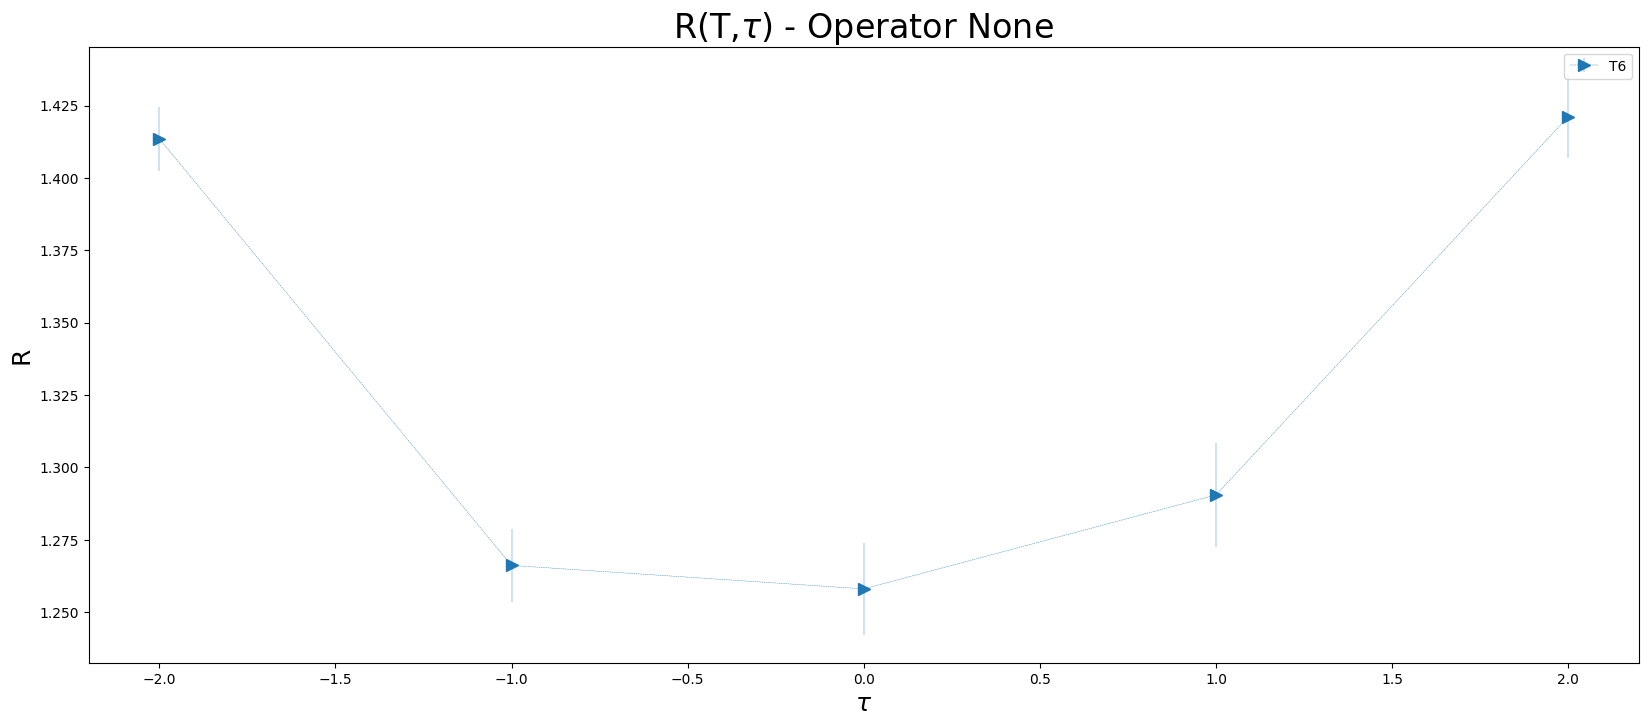

In [ ]:
opAnalyzer.select_operator()
op2 = opAnalyzer.get_operator(2)
op3 = opAnalyzer.get_operator(3)

(op2-op3).K.simplify()
opV2 = (op2-op3) /(3*np.sqrt(2))
opV2*np.sqrt(2)

opAnalyzer.selected_op.append(opV2)

opAnalyzer.plot_R(rescale=True,abs=False,component="real")

In [ ]:
(op2-op3).K.simplify()

opV2.K

complex(opV2.K.evalf(subs=subsDict))

3*I*(-E(p)**3 - E(p)*m_N**2 - E(p)*p_1**2 - E(p)*p_2**2 - 3*E(p)*p_3**2 - 2*m_N**3 - 2*m_N*p_1**2 - 2*m_N*p_2**2 - 4*m_N*p_3**2)/(2*E(p)*(E(p) + m_N))

-0.235702260395516*I*(-p_1**2 - p_2**2 + 2*p_3**2)/E(p) + 0.117851130197758*I*(-3*E(p)**3 - 3*E(p)*m_N**2 - 5*E(p)*p_1**2 - 5*E(p)*p_2**2 - 5*E(p)*p_3**2 - 6*m_N**3 - 8*m_N*p_1**2 - 8*m_N*p_2**2 - 8*m_N*p_3**2)/(E(p)*(E(p) + m_N))

-0.2938825993094576j

O[1, 1]/6 + O[2, 2]/6 + O[3, 3]/6 - O[4, 4]/2

I*(-3*E(p)**3 - 3*E(p)*m_N**2 - 5*E(p)*p_1**2 - 5*E(p)*p_2**2 - 5*E(p)*p_3**2 - 6*m_N**3 - 8*m_N*p_1**2 - 8*m_N*p_2**2 - 8*m_N*p_3**2)/(12*E(p)*(E(p) + m_N))

-0.20780637884444647j

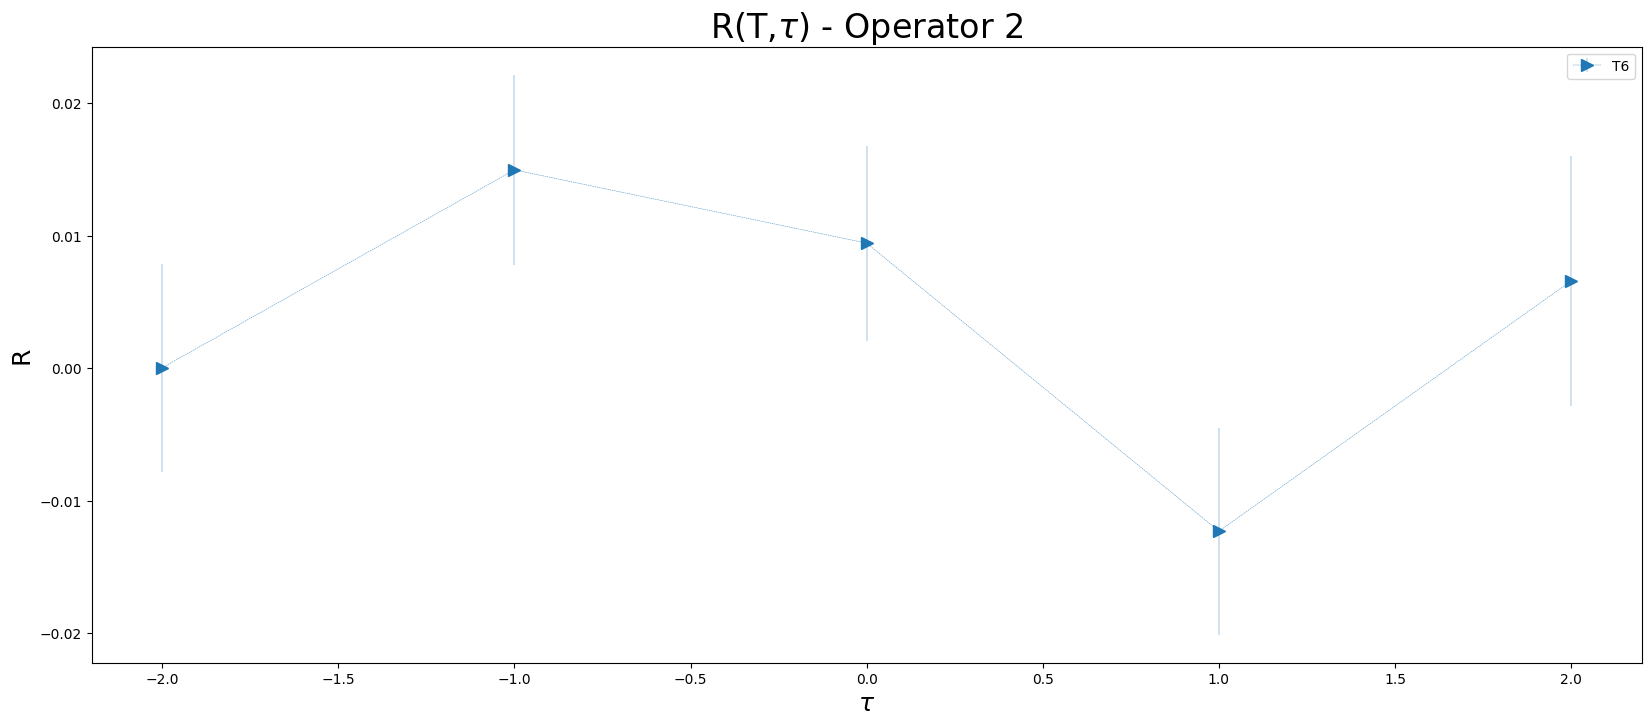

In [ ]:
opAnalyzer.select_operator()

opV1 = opAnalyzer.get_operator(2) / 6

opV1
opV1.K
complex(opV1.K.evalf(subs=subsDict))

opAnalyzer.selected_op.append(opV1)

opAnalyzer.plot_R(rescale=True,abs=False,component="imag")